In [1]:
from vqls_program import main
from qiskit_ibm_runtime.program import UserMessenger
from qiskit import Aer
import numpy as np
from qiskit.circuit.library.n_local.real_amplitudes import RealAmplitudes
from qiskit.algorithms.optimizers import COBYLA

In [2]:
msg = UserMessenger()
backend = Aer.get_backend("aer_simulator_statevector")

In [3]:
A = np.random.rand(4,4)
A = (A+A.T)
b = np.random.rand(4)
ansatz = RealAmplitudes(2, entanglement='full', reps=3, insert_barriers=False)

In [4]:
# Execute the main routine for our simple two-qubit Hamiltonian H, and perform 5 iterations of the SPSA solver.
res = main(backend, Npne, A, b, ansatz,
           optimizer="COBYLA", optimizer_config={"maxiter": 200},
           shots=1, normalize_cost_function=True)

Use exact statistic from state vector
Cost function 0.304702
Cost function 0.327748
Cost function 0.599166
Cost function 0.327939
Cost function 0.304056
Cost function 0.542681
Cost function 0.398617
Cost function 0.552292
Cost function 0.193636
Cost function 0.182389
Cost function 0.199911
Cost function 0.172747
Cost function 0.168448
Cost function 0.154968
Cost function 0.214927
Cost function 0.154474
Cost function 0.174433
Cost function 0.167037
Cost function 0.169847
Cost function 0.156618
Cost function 0.154364
Cost function 0.153207
Cost function 0.148674
Cost function 0.136310
Cost function 0.113626
Cost function 0.130581
Cost function 0.102533
Cost function 0.124507
Cost function 0.110218
Cost function 0.119988
Cost function 0.105449
Cost function 0.104578
Cost function 0.105206
Cost function 0.119666
Cost function 0.089781
Cost function 0.086179
Cost function 0.086046
Cost function 0.100051
Cost function 0.061154
Cost function 0.049122
Cost function 0.043706
Cost function 0.046

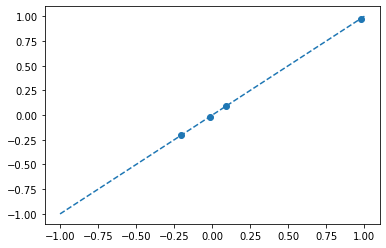

In [5]:
from qiskit.quantum_info import Statevector 
import matplotlib.pyplot as plt
from qiskit.algorithms.linear_solvers.numpy_linear_solver import NumPyLinearSolver
classical_solution = NumPyLinearSolver().solve(A,b/np.linalg.norm(b))

opt_parameters = dict(zip(ansatz.parameters, res.x))
solution = ansatz.assign_parameters(opt_parameters)

ref_solution = classical_solution.state / np.linalg.norm(classical_solution.state) 
vqls_solution = np.real(Statevector(solution).data )


plt.scatter(ref_solution, vqls_solution)
plt.plot([-1,1],[-1,1],'--')